In [240]:
# we train load_tuntun_data_v1 - v3 using andrew's data

In [1]:
import pandas as pd

In [94]:
fname = "../tuntun_data/sample_data_1.csv"

In [95]:
fname = "../tuntun_data/Daily93Tuntun.csv"

In [7]:
fname = "../tuntun_data/Daily93Tuntun_splitted.csv"
df = pd.read_csv(fname)
df

,AALI,1997-12-09,1310.17,1468.34,1230.13,1468.34.1,7827668
0,AALI,1997-12-10,1468.34,1567.44,1468.34,1528.37,2802117
1,AALI,1997-12-11,1508.36,1508.36,1349.24,1349.24,1127144
2,AALI,1997-12-12,1310.17,1310.17,1250.14,1270.15,1200817
3,AALI,1997-12-15,1230.13,1310.17,1191.06,1310.17,1098808
4,AALI,1997-12-16,1310.17,1508.36,1310.17,1448.33,516975
...,...,...,...,...,...,...,...
1048570,DEFI,2008-12-05,63.00,63.00,63.00,63.00,0
1048571,DEFI,2008-12-09,63.00,63.00,63.00,63.00,0
1048572,DEFI,2008-12-10,63.00,63.00,63.00,63.00,0
1048573,DEFI,2008-12-11,63.00,63.00,63.00,63.00,0


In [1]:
!ls ../tuntun_data

Daily93Tuntun.csv	Daily93Tuntun_edited.csv   Daily93Tuntun_splitted.csv
Daily93Tuntun_2022.csv	Daily93Tuntun_sampled.csv  py_scripts


In [20]:
import pandas as pd

# Read the CSV file without headers
df = pd.read_csv("../tuntun_data/Daily93Tuntun_2010-2021.csv")

# Rename the columns
# column_names = {
#     0: 'tic',
#     1: 'date',
#     2: 'open',
#     3: 'high',
#     4: 'low',
#     5: 'close',
#     6: 'volume'
# }

# Apply the new column names
# df = df.rename(columns=column_names)
# df = df.drop_duplicates(subset=["date"])
df

,date,open,high,low,close,volume,tic,day
0,2010-02-16,22.0,35.0,19.0,33.0,7181000,KBRI-W,4183
1,2010-02-16,255.0,255.0,255.0,255.0,0,TBLA-W,4183
2,2010-02-17,33.0,33.0,25.0,26.0,424000,KBRI-W,4184
3,2010-02-17,255.0,255.0,255.0,255.0,0,TBLA-W,4184
4,2010-02-18,25.0,40.0,24.0,33.0,6675500,KBRI-W,4185
...,...,...,...,...,...,...,...,...
456815,2021-12-30,840.0,860.0,800.0,800.0,20900,YPAS,7079
456816,2021-12-30,1410.0,1560.0,1360.0,1510.0,117600,YULE,7079
456817,2021-12-30,650.0,655.0,625.0,645.0,1667500,ZBRA,7079
456818,2021-12-30,105.0,107.0,103.0,105.0,933951600,ZINC,7079


In [ ]:
# def remove_w(tic):
#     if "-" in tic:
#         return tic.split("-")[0]
#     return tic

In [ ]:
# df["tic"] = df["tic"].apply(remove_w)

In [21]:
tickers = sorted(df["tic"].unique())
len(tickers)
# tickers

910

In [ ]:
# sample_tics = [
#  'AALI',
#  'ABBA',
#  'ABDA',
#  'ABMM',
#  'ABX',
#  'ACAP',
#  'ACES',
#  'ACRO',
#  'ACST',
#  'ADCP',
#  'ADES',
#  'ADFO',
#  'ADHI',
#  'ADMF',
#  'ADMG',
#  'ADMR',
#  'ADRO']

In [4]:
# df = df[df["tic"].isin(sample_tics)]
# df

In [ ]:
# df['date'] = pd.to_datetime(df['date'])

# # Get unique dates and create a mapping dictionary
# unique_dates = df['date'].sort_values().unique()
# date_to_day_mapping = {date: idx for idx, date in enumerate(unique_dates)}

# # Create the day column using the mapping
# df['day'] = df['date'].map(date_to_day_mapping)

# # Sort the DataFrame by date and tic
# df = df.sort_values(['date', 'tic'], ascending=[True, True])

# # Optional: Display some information to verify
# print("First few rows:")
# print(df[['date', 'day', 'tic']].head(10))

# print("\nVerification:")
# print(f"Number of unique dates: {len(unique_dates)}")
# print(f"Day index range: {df['day'].min()} to {df['day'].max()}")

In [ ]:
# cols = ['date', 'open', 'high', 'low', 'close', 'volume', 'tic', 'day']

In [ ]:
# df = df[cols]
# df

In [196]:
import warnings
warnings.filterwarnings("ignore")

In [197]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.config_tickers import DOW_30_TICKER
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent,DRLEnsembleAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

In [202]:
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
INDICATORS = ['macd',
               'rsi_30',
               'cci_30',
               'dx_30']
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

In [ ]:
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.config_tickers import DOW_30_TICKER

TRAIN_START_DATE = '2020-12-30'
TRAIN_END_DATE = '2021-09-31'

TEST_START_DATE = '2021-10-01'
TEST_END_DATE = '2021-12-30'

ydf = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TEST_END_DATE,
                     ticker_list = DOW_30_TICKER).fetch_data()

In [204]:
print(ydf.head())  # Display the first 5 rows
print(ydf.columns) # Display the column names

         date        open        high         low       close    volume   tic  \
0  2020-12-30  130.758789  133.720001  135.990005  135.580002  96452100  AAPL   
1  2020-12-30  200.395477  227.169998  229.029999  227.979996   1891400  AMGN   
2  2020-12-30  113.484818  119.430000  119.949997  118.250000   1954200   AXP   
3  2020-12-30  216.669998  216.669998  218.550003  216.360001  10812600    BA   
4  2020-12-30  166.183563  180.039993  182.229996  179.770004   2720600   CAT   

   day  
0    2  
1    2  
2    2  
3    2  
4    2  
Index(['date', 'open', 'high', 'low', 'close', 'volume', 'tic', 'day'], dtype='object')


In [205]:
from finrl.meta.preprocessor.preprocessors import FeatureEngineer
yfe = FeatureEngineer(use_technical_indicator=True,
                     tech_indicator_list = INDICATORS,
                     use_turbulence=True,
                     user_defined_feature = False)

yprocessed = yfe.preprocess_data(ydf)
yprocessed = yprocessed.copy()
yprocessed = yprocessed.fillna(0)
yprocessed = yprocessed.replace(np.inf,0)

BEFORE CLEAN:             date        open        high         low       close    volume  \
0     2020-12-30  130.758789  133.720001  135.990005  135.580002  96452100   
1     2020-12-30  200.395477  227.169998  229.029999  227.979996   1891400   
2     2020-12-30  113.484818  119.430000  119.949997  118.250000   1954200   
3     2020-12-30  216.669998  216.669998  218.550003  216.360001  10812600   
4     2020-12-30  166.183563  180.039993  182.229996  179.770004   2720600   
...          ...         ...         ...         ...         ...       ...   
7555  2021-12-29  486.059204  505.579987  507.220001  504.779999   1573900   
7556  2021-12-29  213.196503  218.169998  218.940002  217.759995   3223100   
7557  2021-12-29   43.356762   52.360001   52.880001   52.770000  15109500   
7558  2021-12-29   43.065460   52.250000   52.310001   51.450001   5117300   
7559  2021-12-29   45.684811   47.570000   47.843334   47.553333  13045200   

       tic  day  
0     AAPL    2  
1     AMGN   

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 180.22it/s]



rsi_30


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 168.53it/s]



cci_30


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 12.76it/s]



dx_30


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 72.54it/s]


Successfully added technical indicators
Successfully added turbulence index


In [83]:
raw_df = pd.read_csv("../tuntun_data/Daily93Tuntun_2010-2021.csv")

In [98]:
# raw_df = pd.read_csv("../tuntun_data/Daily93Tuntun_sampled.csv")
raw_df = raw_df[pd.to_datetime(raw_df['date']) > pd.Timestamp('2009-01-01')]
raw_df = raw_df[~raw_df['tic'].str.contains('-')]
raw_df = raw_df.drop_duplicates(subset=['date', 'tic'])
raw_df

,date,open,high,low,close,volume,tic,day
134,2010-05-03,2800.0,2800.0,2800.0,2800.0,0,ALFA,4234
135,2010-05-03,162.0,162.0,162.0,162.0,500,ANTA,4234
137,2010-05-03,1050.0,1050.0,1050.0,1050.0,0,DYNA,4234
142,2010-05-04,2800.0,2800.0,2800.0,2800.0,0,ALFA,4235
143,2010-05-04,162.0,162.0,162.0,162.0,0,ANTA,4235
...,...,...,...,...,...,...,...,...
456815,2021-12-30,840.0,860.0,800.0,800.0,20900,YPAS,7079
456816,2021-12-30,1410.0,1560.0,1360.0,1510.0,117600,YULE,7079
456817,2021-12-30,650.0,655.0,625.0,645.0,1667500,ZBRA,7079
456818,2021-12-30,105.0,107.0,103.0,105.0,933951600,ZINC,7079


In [95]:
tic_counts = df['tic'].value_counts()
sorted_tic_counts = tic_counts.sort_values(ascending=False)

# Print the top 10 `tic` with their counts
tickers = sorted_tic_counts.tail(30).index.tolist()

In [ ]:
# Step 3: Count rows where 'volume' is 0 for each 'tic'
volume_zero_count = raw_df[raw_df['volume'] == 0].groupby('tic').size()

# Step 4: Sort the counts in descending order
sorted_volume_zero_count = volume_zero_count.sort_values(ascending=True)

# Step 5: Get the top 10 'tic' with their counts
top_n_tic = sorted_volume_zero_count.head(30)
tickers = top_n_tic.index.tolist()
tickers

In [239]:
df = raw_df[raw_df["tic"].isin(tickers)]
df

,date,open,high,low,close,volume,tic,day
39536,2019-12-10,1025.00,1045.00,1025.00,1040.00,16400,ADES,6578
39581,2019-12-10,272.02,272.02,267.03,269.53,338995,ARTO,6578
39584,2019-12-10,950.00,985.00,950.00,965.00,263400,ASGR,6578
39603,2019-12-10,63.00,67.00,62.00,66.00,68900,BAJA,6578
39613,2019-12-10,231.50,235.45,227.54,227.54,1935298,BBKP,6578
...,...,...,...,...,...,...,...,...
456726,2021-12-30,222.00,222.00,218.00,220.00,91500,TOTO,7079
456755,2021-12-30,50.00,50.00,50.00,50.00,754500,VIVA,7079
456761,2021-12-30,208.00,218.00,204.00,212.00,29797700,WEHA,7079
456770,2021-12-30,112.00,121.00,110.00,114.00,61218500,WSBP,7079


In [ ]:
from finrl.meta.preprocessor.preprocessors import FeatureEngineer
fe = FeatureEngineer(use_technical_indicator=True,
                     tech_indicator_list = INDICATORS,
                     use_turbulence=True,
                     user_defined_feature = False)

processed = fe.preprocess_data(df)
processed = processed.copy()
processed = processed.fillna(0)
processed = processed.replace(np.inf,0)

In [131]:
len(processed.tic.unique())

30

In [163]:
processed

,date,open,high,low,close,volume,tic,day,macd,rsi_30,cci_30,dx_30,turbulence
0,2019-12-10,1025.00,1045.00,1025.00,1040.00,16400,ADES,6578,0.000000,100.000000,66.666667,100.000000,0.000000
1,2019-12-10,272.02,272.02,267.03,269.53,338995,ARTO,6578,0.000000,100.000000,66.666667,100.000000,0.000000
2,2019-12-10,950.00,985.00,950.00,965.00,263400,ASGR,6578,0.000000,100.000000,66.666667,100.000000,0.000000
3,2019-12-10,63.00,67.00,62.00,66.00,68900,BAJA,6578,0.000000,100.000000,66.666667,100.000000,0.000000
4,2019-12-10,231.50,235.45,227.54,227.54,1935298,BBKP,6578,0.000000,100.000000,66.666667,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,2021-12-30,222.00,222.00,218.00,220.00,91500,TOTO,7079,0.855402,53.108033,36.192214,35.057224,22.819539
15056,2021-12-30,50.00,50.00,50.00,50.00,754500,VIVA,7079,-0.018190,45.734408,-45.454545,96.471128,22.819539
15057,2021-12-30,208.00,218.00,204.00,212.00,29797700,WEHA,7079,3.146659,51.961705,52.954197,9.350527,22.819539
15058,2021-12-30,112.00,121.00,110.00,114.00,61218500,WSBP,7079,-6.738763,36.126025,-85.778781,2.908290,22.819539


In [178]:
def process_dataframe(df):
    # Filter the DataFrame to exclude rows where any of the specified columns have a value of 0
    filtered_df = df[(df['macd'] != 0) & (df['rsi_30'] != 0) & (df['cci_30'] != 0) & (df['dx_30'] != 0) & (df['turbulence'] != 0)]
    return filtered_df
processed3 = process_dataframe(processed)
processed3

,date,open,high,low,close,volume,tic,day,macd,rsi_30,cci_30,dx_30,turbulence
7620,2020-12-30,1515.00,1515.00,1460.00,1460.00,235400,ADES,6832,74.203323,59.122773,52.119178,31.040327,107.436939
7621,2020-12-30,3574.41,3649.05,3532.94,3566.11,3192099,ARTO,6832,268.697751,71.290494,116.691872,59.333490,107.436939
7622,2020-12-30,815.00,825.00,800.00,800.00,1117200,ASGR,6832,18.724520,56.098438,26.030369,4.292294,107.436939
7623,2020-12-30,124.00,135.00,115.00,116.00,8926200,BAJA,6832,2.600991,53.189673,-39.186134,33.364243,107.436939
7624,2020-12-30,610.00,630.00,570.00,575.00,511510100,BBKP,6832,86.385199,76.442860,139.680588,67.213960,107.436939
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,2021-12-30,222.00,222.00,218.00,220.00,91500,TOTO,7079,0.855402,53.108033,36.192214,35.057224,22.819539
15056,2021-12-30,50.00,50.00,50.00,50.00,754500,VIVA,7079,-0.018190,45.734408,-45.454545,96.471128,22.819539
15057,2021-12-30,208.00,218.00,204.00,212.00,29797700,WEHA,7079,3.146659,51.961705,52.954197,9.350527,22.819539
15058,2021-12-30,112.00,121.00,110.00,114.00,61218500,WSBP,7079,-6.738763,36.126025,-85.778781,2.908290,22.819539


In [179]:
# processed2 = processed[processed["volume"] > 0]
# len(processed2.tic.unique())

In [130]:
# fprocessed = "/home/devmiftahul/trading_model/tuntun_data/Daily93Tuntun_2020-2021_processed.csv"
# processed.to_csv(fprocessed)
# processed = pd.read_csv(fprocessed)

In [177]:
# stock_dimension = len(processed.tic.unique())
# state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
# print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

In [180]:
stock_dimension = len(processed3.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 30, State Space: 181


In [206]:
stock_dimension = len(yprocessed.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 30, State Space: 181


In [207]:
env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "buy_cost_pct": 0.001,
    "sell_cost_pct": 0.001,
    "state_space": state_space,
    # "state_space": 176,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4,
    "print_verbosity":5
}

In [216]:
TRAIN_START_DATE = '2020-12-30'
TRAIN_END_DATE = '2021-09-31'

TEST_START_DATE = '2021-10-01'
TEST_END_DATE = '2021-12-30'
rebalance_window = 6 # rebalance_window is the number of days to retrain the model
validation_window = 6 # validation_window is the number of days to do validation and trading (e.g. if validation_window=63, then both validation and trading period will be 63 days)

ensemble_agent = DRLEnsembleAgent(df=processed,
                 train_period=(TRAIN_START_DATE,TRAIN_END_DATE),
                 val_test_period=(TEST_START_DATE,TEST_END_DATE),
                 rebalance_window=rebalance_window,
                 validation_window=validation_window,
                 **env_kwargs)

In [217]:
A2C_model_kwargs = {
                    'n_steps': 5,
                    'ent_coef': 0.005,
                    'learning_rate': 0.0007
                    }

PPO_model_kwargs = {
                    "ent_coef":0.01,
                    "n_steps": 2048,
                    "learning_rate": 0.00025,
                    "batch_size": 128
                    }

DDPG_model_kwargs = {
                      #"action_noise":"ornstein_uhlenbeck",
                      "buffer_size": 10_000,
                      "learning_rate": 0.0005,
                      "batch_size": 64
                    }

SAC_model_kwargs = {
    "batch_size": 64,
    "buffer_size": 1000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

TD3_model_kwargs = {"batch_size": 10, "buffer_size": 1000, "learning_rate": 0.0001}

timesteps_dict = {'a2c' : 10_000,
                 'ppo' : 10_000,
                 'ddpg' : 10_000,
                 'sac' : 10_000,
                 'td3' : 10_000
                 }

In [ ]:
df_summary = ensemble_agent.run_ensemble_strategy(A2C_model_kwargs,
                                                 PPO_model_kwargs,
                                                 DDPG_model_kwargs,
                                                 SAC_model_kwargs,
                                                 TD3_model_kwargs,
                                                 timesteps_dict)

In [220]:
df_summary

,Iter,Val Start,Val End,Model Used,A2C Sharpe,PPO Sharpe,DDPG Sharpe,SAC Sharpe,TD3 Sharpe
0,12,2021-10-04,2021-10-12,DDPG,-0.696701,-0.071417,0.809779,-0.363352,-0.206409
1,18,2021-10-12,2021-10-21,A2C,1.302665,-0.313012,1.175699,-0.899254,0.670814
2,24,2021-10-21,2021-10-29,TD3,-1.095693,-1.590397,-1.890437,-2.303653,1.104635
3,30,2021-10-29,2021-11-08,PPO,0.132906,0.174225,0.118607,-0.581076,-0.640579
4,36,2021-11-08,2021-11-16,TD3,-0.539072,-3.264729,-0.30517,-1.05876,-0.288115
5,42,2021-11-16,2021-11-24,DDPG,-0.104832,0.013483,0.358132,-1.416375,-2.591318
6,48,2021-11-24,2021-12-02,SAC,-0.273097,0.010434,-0.270558,0.508973,-0.201793
7,54,2021-12-02,2021-12-10,TD3,1.400161,-1.330511,0.633044,0.01392,1.679771
8,60,2021-12-10,2021-12-20,DDPG,0.172432,-0.034937,0.964272,-4.378652,0.049612


In [223]:
TRAIN_START_DATE

'2020-12-30'

In [224]:
TRAIN_END_DATE

'2021-09-31'

In [225]:
TEST_START_DATE

'2021-10-01'

In [226]:
TEST_END_DATE

'2021-12-30'

In [227]:
unique_trade_date = processed[(processed.date > TEST_START_DATE)&(processed.date <= TEST_END_DATE)].date.unique()

In [229]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

df_account_value=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
    temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format('ensemble',i))
    # df_account_value = df_account_value.append(temp,ignore_index=True)
    df_account_value = pd.concat([df_account_value, temp], ignore_index=True)
sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
print('Sharpe Ratio: ',sharpe)
df_account_value=df_account_value.join(df_trade_date[validation_window:].reset_index(drop=True))

Sharpe Ratio:  -1.9601230143825896


In [238]:
df_account_value

,account_value,date,daily_return,datadate
0,1000000.000,2021-10-12,NaN,2021-10-12
1,977056.500,2021-10-13,-0.022943,2021-10-13
2,975207.011,2021-10-14,-0.001893,2021-10-14
3,1000874.011,2021-10-15,0.026320,2021-10-15
4,994541.011,2021-10-18,-0.006327,2021-10-18
5,993050.011,2021-10-19,-0.001499,2021-10-19
6,976853.011,2021-10-21,NaN,2021-10-21
7,976333.677,2021-10-22,-0.000532,2021-10-22
8,974297.137,2021-10-25,-0.002086,2021-10-25
9,974060.874,2021-10-26,-0.000242,2021-10-26


<Axes: >

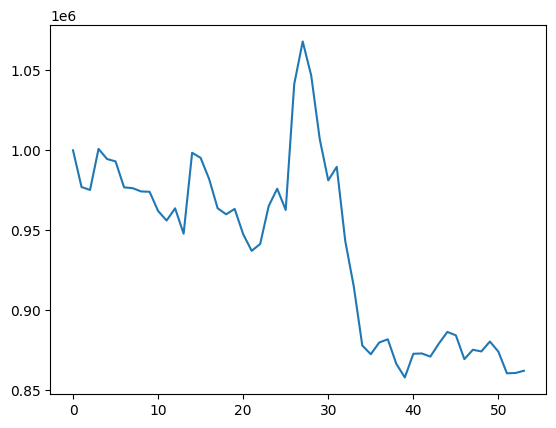

In [231]:
%matplotlib inline
df_account_value.account_value.plot()

In [232]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
Annual return         -0.499313
Cumulative returns    -0.137773
Annual volatility      0.331893
Sharpe ratio          -1.960123
Calmar ratio          -2.539844
Stability              0.583820
Max drawdown          -0.196592
Omega ratio            0.693409
Sortino ratio         -2.888793
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.780301
Daily value at risk   -0.044396
dtype: float64


In [236]:
#baseline stats
print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
        ticker="^BSL", 
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(df_dji_, value_col_name = 'close')

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['^BSL']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


==============Get Baseline Stats===========


ValueError: no data is fetched.

In [ ]:
 def calculate_turbulence(data):
        """calculate turbulence index based on dow 30"""
        # can add other market assets
        df = data.copy()
        df_price_pivot = df.pivot(index="date", columns="tic", values="close")
        
        # use returns to calculate turbulence
        df_price_pivot = df_price_pivot.pct_change()
        print(df_price_pivot)

        unique_date = df.date.unique()
        print(len(unique_date))
        # start after a year
        start = 252
        turbulence_index = [0] * start
        # turbulence_index = [0]
        count = 0
        for i in range(start, len(unique_date)):
            current_price = df_price_pivot[df_price_pivot.index == unique_date[i]]
            # use one year rolling window to calcualte covariance
            hist_price = df_price_pivot[
                (df_price_pivot.index < unique_date[i])
                & (df_price_pivot.index >= unique_date[i - 252])
            ]
            # Drop tickers which has number missing values more than the "oldest" ticker
            filtered_hist_price = hist_price.iloc[
                hist_price.isna().sum().min() :
            ].dropna(axis=1)

            cov_temp = filtered_hist_price.cov()
            current_temp = current_price[[x for x in filtered_hist_price]] - np.mean(
                filtered_hist_price, axis=0
            )
            # cov_temp = hist_price.cov()
            # current_temp=(current_price - np.mean(hist_price,axis=0))

            temp = current_temp.values.dot(np.linalg.pinv(cov_temp)).dot(
                current_temp.values.T
            )
            if temp > 0:
                count += 1
                if count > 2:
                    turbulence_temp = temp[0][0]
                else:
                    # avoid large outlier because of the calculation just begins
                    turbulence_temp = 0
            else:
                turbulence_temp = 0
            turbulence_index.append(turbulence_temp)
        try:
            turbulence_index = pd.DataFrame(
                {"date": df_price_pivot.index, "turbulence": turbulence_index}
            )
        except ValueError:
            raise Exception("Turbulence information could not be added.")
        return turbulence_index

turbulence_index = calculate_turbulence(df_equalized)

In [1]:
from stockstats import StockDataFrame as Sdf

In [61]:
df

,date,open,high,low,close,volume,tic,day
11885,1993-01-04,950.0,950.0,950.0,950.0,0,ABDA,0
11886,1993-01-05,950.0,950.0,950.0,950.0,0,ABDA,1
11887,1993-01-06,950.0,950.0,950.0,950.0,0,ABDA,2
11888,1993-01-07,950.0,950.0,950.0,950.0,0,ABDA,3
11889,1993-01-08,950.0,950.0,950.0,950.0,0,ABDA,4
...,...,...,...,...,...,...,...,...
6383,2024-03-04,6775.0,6825.0,6700.0,6700.0,834800,AALI,7601
6384,2024-03-05,6725.0,6725.0,6600.0,6625.0,1008900,AALI,7602
6385,2024-03-06,6625.0,6650.0,6550.0,6575.0,1463200,AALI,7603
6386,2024-03-07,6575.0,6700.0,6575.0,6650.0,917900,AALI,7604


In [112]:
stock = Sdf.retype(ydf.copy())

In [113]:
stock

,open,high,low,close,volume,tic,day
date,,,,,,,
2020-01-02,72.796021,75.087502,75.150002,74.059998,135480400,AAPL,3
2020-01-02,206.104721,240.100006,243.190002,243.000000,2088000,AMGN,3
2020-01-02,117.895065,125.849998,126.269997,124.660004,2708000,AXP,3
2020-01-02,331.348572,333.320007,333.350006,328.549988,4544400,BA,3
2020-01-02,134.881500,150.529999,150.550003,149.000000,3311900,CAT,3
...,...,...,...,...,...,...,...
2021-12-29,486.059235,505.579987,507.220001,504.779999,1573900,UNH,2
2021-12-29,213.196487,218.169998,218.940002,217.759995,3223100,V,2
2021-12-29,43.356770,52.360001,52.880001,52.770000,15109500,VZ,2


In [110]:
stock.tic

AttributeError: 'function' object has no attribute 'tic'

In [111]:
unique_ticker = stock.tic.unique()

AttributeError: 'function' object has no attribute 'tic'